In [2]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from iqx import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

⚠️ Package 'iqx' is deprecated. Use 'ibm_quantum_widgets' instead.


/opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


- `Aer` is qiskit simulation package.


- A specific simulator or device is called a `backend`.


- `execute` takes a quantum circuit, or list of circuits, and a `backend` runs the circuits.


- By default, `execute` simulates `shots=1024` realizations of the circuit.



In [3]:
Aer.backends()

[QasmSimulator(
 backend_name='qasm_simulator', provider=AerProvider()),
 StatevectorSimulator(
 backend_name='statevector_simulator', provider=AerProvider()),
 UnitarySimulator(
 backend_name='unitary_simulator', provider=AerProvider()),
 PulseSimulator(
 backend_name='pulse_simulator', provider=AerProvider())]

## Single Qubit Operations - X, H and Z

### X gate : Not gate

$X = \begin{bmatrix}0 & 1 \\ 1 & 0 \end{bmatrix} , ~~~~~~ XX = I$

$X|0\rangle = |1\rangle ~~~~~~~~~ X|1\rangle = |0\rangle $

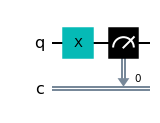

In [4]:
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.measure(0, 0)
qc.draw()

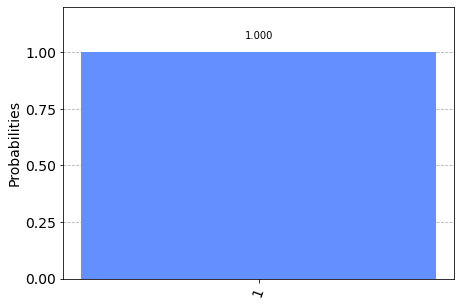

In [5]:
backend = Aer.get_backend('qasm_simulator')

job = execute(qc, backend)
results = job.result()
counts = results.get_counts()

plot_histogram(counts)

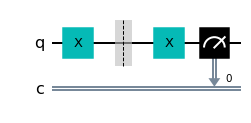

In [6]:
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.barrier()
qc.x(0)
qc.measure(0, 0)
qc.draw()

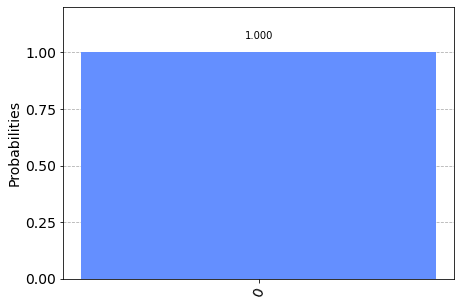

In [7]:
job = execute(qc, backend)
results = job.result()
counts = results.get_counts()

plot_histogram(counts)

### H gate : Hadamard gate, create superposition

$H = \frac{1}{\sqrt{2}} \begin{bmatrix}1 & 1 \\ 1 & -1 \end{bmatrix} , ~~~~~~  HH = I $

$H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = |+\rangle ~~~~~~~~~
H|1\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = |-\rangle$ 

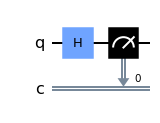

In [8]:
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)

qc.draw()

In [9]:
job = execute(qc, backend)
results = job.result()
counts = results.get_counts()

#plot_histogram(counts)

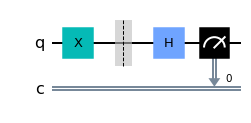

In [10]:
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.barrier()
qc.h(0)
qc.measure(0, 0)

qc.draw()

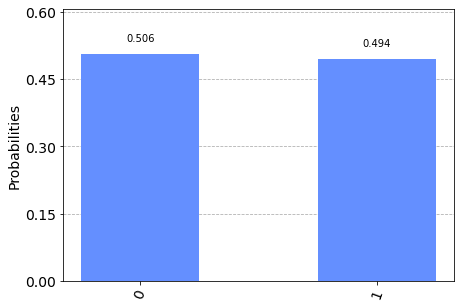

In [11]:
job = execute(qc, backend)
results = job.result()
counts = results.get_counts()

plot_histogram(counts)

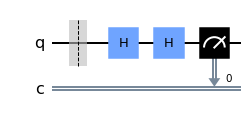

In [12]:
qc = QuantumCircuit(1, 1)
#qc.x(0)
qc.barrier()
qc.h(0)
qc.h(0)
qc.measure(0, 0)
qc.draw()

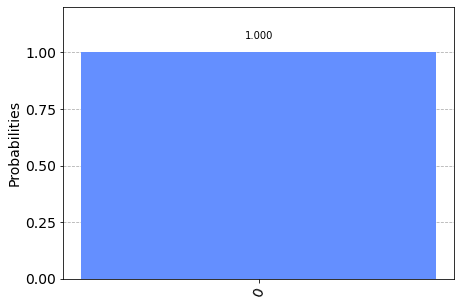

In [13]:
job = execute(qc, backend)
results = job.result()
counts = results.get_counts()

plot_histogram(counts)

### Z gate :  create relative phase $\pi$

$Z = \begin{bmatrix}1 & 0 \\ 0 & -1 \end{bmatrix} , ~~~~~~ ZZ=I $

$Z|0\rangle = |0\rangle ~~~~~~~~~
Z|1\rangle = e^{i\pi} |1\rangle = - |1\rangle $ 

### S gate:  create relative phase $\pi/2$

$S = \begin{bmatrix}1 & 0 \\ 0 & i \end{bmatrix} ~~~~~~ SS^{\dagger}=I $

$S|0\rangle = |0\rangle ~~~~~~~~~
S|1\rangle = e^{i\pi/2}|1\rangle = i |1\rangle $ 

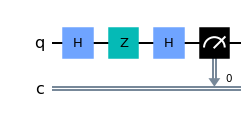

In [14]:
qc_z = QuantumCircuit(1, 1)
qc_z.h(0)
qc_z.z(0)
qc_z.h(0)
qc_z.measure(0, 0)
qc_z.draw()

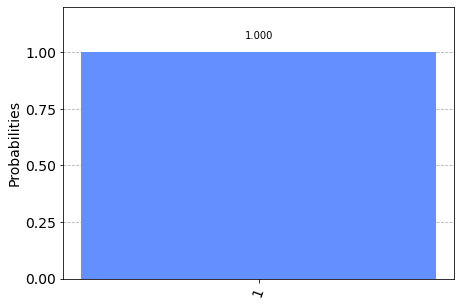

In [15]:
job = execute(qc_z, backend)
results = job.result()
counts = results.get_counts()

plot_histogram(counts)

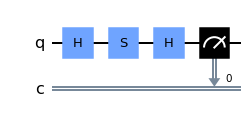

In [16]:
qc_s = QuantumCircuit(1,1)
qc_s.h(0)
qc_s.s(0)
qc_s.h(0)
qc_s.measure(0, 0)
qc_s.draw('mpl')

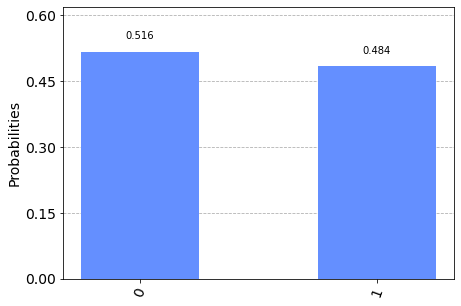

In [17]:
job = execute(qc_s, backend)
results = job.result()
counts = results.get_counts()

plot_histogram(counts)

## Composite system, Entanglement, two-qubit Gate

### Construct Bell state

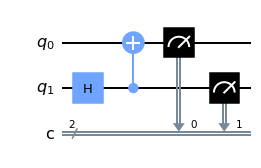

In [23]:
bell = QuantumCircuit(2, 2)
bell.h(1)
bell.cx(1,0)
bell.measure(range(2), range(2))
bell.draw()

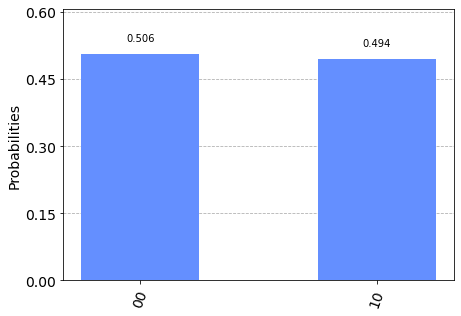

In [19]:
job = execute(bell, backend)
counts = job.result().get_counts()

plot_histogram(counts)

## Execute Bell State on Quantum Computer

### Choose a system.

In [20]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [21]:
backend = provider.get_backend('ibmq_athens')

### Execute Bell state on the chosen quantum system.

Maximum number of shots : 8192

In [25]:
max_shots = 8192
#job = execute(bell, backend, shots=max_shots)
job = backend.retrieve_job('603a3de5e1cffb19e473080a')

In [ ]:
counts = job.result().get_counts()
plot_histogram(counts)

In [ ]:
backend2 = provider.get_backend('ibmqx2')

#job2 = execute(bell, backend2, shots=max_shots)
job2 = backend2.retrieve_job('6027c5c3c78b8f20e02771b5')

In [ ]:
counts2 = job2.result().get_counts()
plot_histogram(counts2)

**Near-term Quantum Systems have noisy qubits, gates, and measurements.**

The noise properties of devices and individual qubits are different.